Found 1786 files belonging to 7 classes.
Using 1429 files for training.
Found 1786 files belonging to 7 classes.
Using 357 files for validation.
Classes: ['10', '100', '20', '200', '2000', '50', '500']
class_names.npy saved


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_2 (Sequential)       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_1 (Rescaling)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
45/45 ━━━━━━━━━━━━━━━━━━━━ 19s 251ms/step - accuracy: 0.2624 - loss: 1.9252 - val_accuracy: 0.4118 - val_loss: 1.3835
Epoch 2/15
45/45 ━━━━━━━━━━━━━━━━━━━━ 9s 209ms/step - accuracy: 0.4962 - loss: 1.3113 - val_accuracy: 0.6275 - val_loss: 1.1169
Epoch 3/15
45/45 ━━━━━━━━━━━━━━━━━━━━ 10s 232ms/step - accuracy: 0.6662 - loss: 0.9163 - val_accuracy: 0.6246 - val_loss: 0.9702
Epoch 4/15
45/45 ━━━━━━━━━━━━━━━━━━━━ 14s 310ms/step - accuracy: 0.7054 - loss: 0.8039 - val_accuracy: 0.8711 - val_loss: 0.4427
Epoch 5/15
45/45 ━━━━━━━━━━━━━━━━━━━━ 14s 302ms/step - accuracy: 0.7950 - loss: 0.5745 - val_accuracy: 0.8235 - val_loss: 0.5447
Epoch 6/15
45/45 ━━━━━━━━━━━━━━━━━━━━ 14s 303ms/step - accuracy: 0.7985 - loss: 0.5464 - val_accuracy: 0.7395 - val_loss: 0.9515
Epoch 7/15
45/45 ━━━━━━━━━━━━━━━━━━━━ 14s 301ms/step - accuracy: 0.8649 - loss: 0.3958 - val_accuracy: 0.8683 - val_loss: 0.4488
Epoch 8/15
45/45 ━━━━━━━━━━━━━━━━━━━━ 13s 298ms/step - accuracy: 0.8558 - loss: 0.3773 - val_accur

Model saved as currency_model2.h5
Final Training Accuracy: 0.9300209879875183
Final Validation Accuracy: 0.9103641510009766


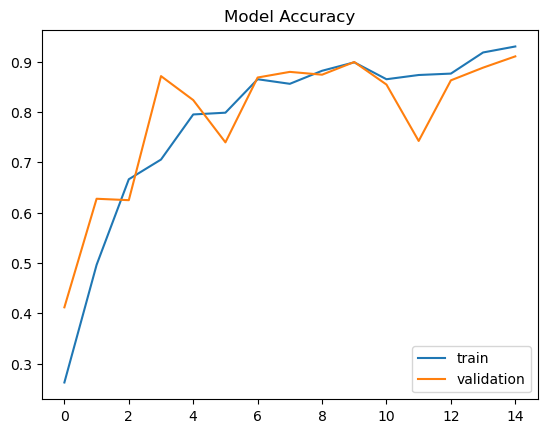

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Basic settings
DATASET_PATH = "dataset"
IMG_SIZE = 224
BATCH_SIZE = 32
EPOCHS = 15

# Load dataset
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    DATASET_PATH,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE
)

val_data = tf.keras.preprocessing.image_dataset_from_directory(
    DATASET_PATH,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE
)

# Save class names
class_names = train_data.class_names
print("Classes:", class_names)

np.save("class_names.npy", class_names)
print("class_names.npy saved")

# Performance optimization
AUTOTUNE = tf.data.AUTOTUNE
train_data = train_data.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_data = val_data.cache().prefetch(buffer_size=AUTOTUNE)

# Data augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
])

# CNN model
model = tf.keras.Sequential([
    data_augmentation,

    tf.keras.layers.Rescaling(1./255, input_shape=(224, 224, 3)),

    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(128, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(len(class_names), activation='softmax')
])

# Compile model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

# Train model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=EPOCHS
)

# Save model
model.save("currency_model2.h5")
print("Model saved as currency_model2.h5")

# Print final accuracy
print("Final Training Accuracy:", history.history['accuracy'][-1])
print("Final Validation Accuracy:", history.history['val_accuracy'][-1])

# Plot accuracy graph
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.legend()
plt.title("Model Accuracy")
plt.show()


In [3]:
import tensorflow as tf
import numpy as np
import cv2

# Model and image settings
MODEL_PATH = "currency_model2.h5"
IMG_SIZE = 224

# Load trained model
model = tf.keras.models.load_model(MODEL_PATH)
print("Model loaded")

# Load class names
class_names = np.load("class_names.npy", allow_pickle=True)
print("Classes:", class_names)

# Function to predict currency from image
def predict_currency(image_path):

    # Read image
    img = cv2.imread(image_path)

    # Check if image exists
    if img is None:
        print("Image not found. Check path.")
        return

    # Convert BGR to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Resize image
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))

    # Add batch dimension
    img = np.expand_dims(img, axis=0)

    # Make prediction
    prediction = model.predict(img)

    predicted_index = np.argmax(prediction)
    confidence = np.max(prediction) * 100

    print("Detected Currency:", class_names[predicted_index])
    print("Confidence:", round(confidence, 2), "%")

# Test image path
predict_currency(
    r"C:\Users\OMEN\OneDrive\Documents\machine learning\ML projects\note classification\dataset\2000\2000_IMG20221111124053.jpg"
)


Model loaded
Classes: ['10' '100' '20' '200' '2000' '50' '500']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
Detected Currency: 2000
Confidence: 100.0 %


In [4]:
import tensorflow as tf
import numpy as np
import cv2

# Model and image settings
MODEL_PATH = "currency_model2.h5"
IMG_SIZE = 224

# Load model and class names
model = tf.keras.models.load_model(MODEL_PATH)
class_names = np.load("class_names.npy", allow_pickle=True)

print("Model loaded")
print("Classes:", class_names)

# Function to predict from webcam frame
def predict_frame(frame):
    img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img = np.expand_dims(img, axis=0)

    prediction = model.predict(img, verbose=0)
    idx = np.argmax(prediction)
    confidence = np.max(prediction) * 100

    return class_names[idx], confidence


# Start webcam
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Camera not working")
    exit()

print("Webcam started. Press Q to exit")

while True:
    ret, frame = cap.read()

    if not ret:
        break

    label, conf = predict_frame(frame)

    # Show prediction on screen
    cv2.putText(
        frame,
        f"{label} ({conf:.1f}%)",
        (20, 50),
        cv2.FONT_HERSHEY_SIMPLEX,
        1,
        (0, 255, 0),
        2
    )

    cv2.imshow("Currency Detection", frame)

    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

cap.release()
cv2.destroyAllWindows()


Model loaded
Classes: ['10' '100' '20' '200' '2000' '50' '500']
Webcam started. Press Q to exit


In [5]:
import tensorflow as tf
import numpy as np
import cv2

# Model and image settings
MODEL_PATH = "currency_model2.h5"
IMG_SIZE = 224

# Load model and class names
model = tf.keras.models.load_model(MODEL_PATH)
print("Model loaded")

class_names = np.load("class_names.npy", allow_pickle=True)
print("Classes:", class_names)


# Image preprocessing
def preprocess_image(frame):

    # Center crop
    h, w, _ = frame.shape
    min_dim = min(h, w)
    start_x = w // 2 - min_dim // 2
    start_y = h // 2 - min_dim // 2
    frame = frame[start_y:start_y + min_dim, start_x:start_x + min_dim]

    # Convert BGR to RGB
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Resize image
    frame = cv2.resize(frame, (IMG_SIZE, IMG_SIZE))

    # Add batch dimension
    frame = np.expand_dims(frame, axis=0)

    return frame


# Webcam detection
def webcam_currency_detection():

    # Start webcam
    cap = cv2.VideoCapture(0, cv2.CAP_DSHOW)
    cap.set(3, 1280)
    cap.set(4, 720)

    if not cap.isOpened():
        print("Webcam not detected")
        return

    print("Press SPACE to predict, ESC to exit")

    last_prediction = ""
    last_confidence = 0

    while True:
        ret, frame = cap.read()

        if not ret:
            break

        display = frame.copy()
        key = cv2.waitKey(1)

        # SPACE key for prediction
        if key == 32:
            img = preprocess_image(frame)
            prediction = model.predict(img, verbose=0)

            idx = np.argmax(prediction)
            confidence = np.max(prediction) * 100

            last_prediction = class_names[idx]
            last_confidence = confidence

            print("Detected:", last_prediction)
            print("Confidence:", round(last_confidence, 2), "%")

        # Show result on screen
        cv2.putText(
            display,
            f"{last_prediction} ({last_confidence:.1f}%)",
            (30, 60),
            cv2.FONT_HERSHEY_SIMPLEX,
            1.5,
            (0, 255, 0),
            3
        )

        cv2.imshow("Currency Detector", display)

        # ESC key to exit
        if key == 27:
            break

    cap.release()
    cv2.destroyAllWindows()


webcam_currency_detection()


Model loaded
Classes: ['10' '100' '20' '200' '2000' '50' '500']
Press SPACE to predict, ESC to exit


In [6]:
import tensorflow as tf

# Load trained model
model = tf.keras.models.load_model("currency_model2.h5")

# Load validation dataset
val_eval = tf.keras.preprocessing.image_dataset_from_directory(
    DATASET_PATH,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE
)

# Evaluate model
loss, accuracy = model.evaluate(val_eval)

print("Model Accuracy:", round(accuracy * 100, 2), "%")


Found 1786 files belonging to 7 classes.
Using 357 files for validation.
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 151ms/step - accuracy: 0.9104 - loss: 0.3906
Model Accuracy: 91.04 %
